<a href="https://colab.research.google.com/github/Ansalnakhan/PROJECT/blob/main/ansalnaSOHandRUL06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1432]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [1433]:
import pandas as pd

In [1434]:
data=pd.read_csv("/content/B0006.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [1435]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


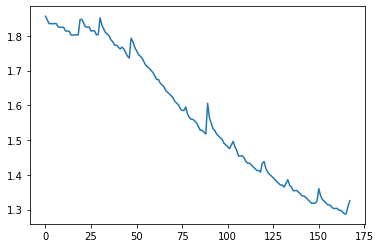

In [1436]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [1437]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [1438]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

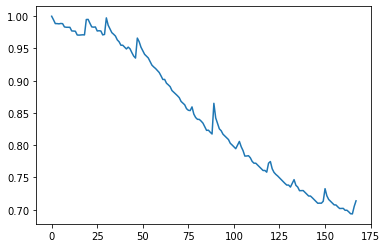

In [1439]:
plt.plot(range(len(soh)),soh)
plt.show()

In [1440]:
capacity=np.asarray(capacity)

In [1441]:
type(capacity)

numpy.ndarray

In [1442]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [1443]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [1444]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.5325
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0661
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 8.8864e-04
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0012


In [1445]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1446]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [1447]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 4ms/step


0.0002734509340776295

In [1448]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.017


In [1449]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01505501]
R2_score:  0.6366671844700058


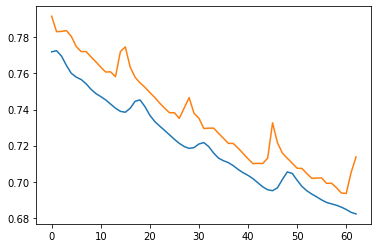

In [1450]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [1451]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1452]:
preds

array([[0.9358031 ],
       [0.93421525],
       [0.93387425],
       [0.9336363 ],
       [0.9325112 ],
       [0.93073195],
       [0.92947674],
       [0.92874616],
       [0.9274647 ],
       [0.9255879 ],
       [0.9239821 ],
       [0.92228025],
       [0.92030424],
       [0.91906697],
       [0.91881907],
       [0.9202409 ],
       [0.92547005],
       [0.9328527 ],
       [0.9362137 ],
       [0.934388  ],
       [0.9312714 ],
       [0.9293644 ],
       [0.92772853],
       [0.92581594],
       [0.9242355 ],
       [0.92255974],
       [0.92213756],
       [0.9260615 ],
       [0.93135315],
       [0.9314806 ],
       [0.92728436],
       [0.92289686],
       [0.91963005],
       [0.91643053],
       [0.91286004],
       [0.9093616 ],
       [0.9065444 ],
       [0.90450114],
       [0.90281636],
       [0.9017459 ],
       [0.90098214],
       [0.89896935],
       [0.89534116],
       [0.8933141 ],
       [0.89734364],
       [0.90469754],
       [0.90694654],
       [0.903

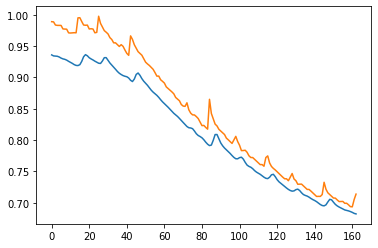

In [1453]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [1454]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [1455]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 1.7727
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2442
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0655
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1789
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0231
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0663
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0316
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0118


In [1456]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1457]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 5ms/step


0.00036551432174559663

In [1458]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.019


In [1459]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01796159]
R2_score:  0.8590887752476813


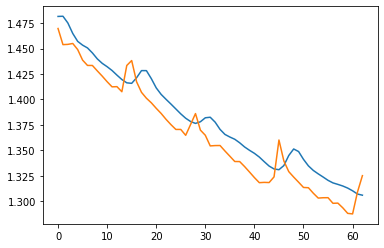

In [1460]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [1461]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1462]:
preds

array([[1.8001555],
       [1.7974583],
       [1.7970093],
       [1.7963542],
       [1.7937671],
       [1.7904286],
       [1.7882122],
       [1.7867732],
       [1.7838722],
       [1.7803881],
       [1.7772933],
       [1.7737142],
       [1.7700686],
       [1.7679406],
       [1.7676426],
       [1.771175 ],
       [1.7831026],
       [1.7964963],
       [1.801436 ],
       [1.7969576],
       [1.7913043],
       [1.7878199],
       [1.7843527],
       [1.7808561],
       [1.7777811],
       [1.7742714],
       [1.774561 ],
       [1.7839495],
       [1.7925429],
       [1.791452 ],
       [1.7826949],
       [1.7746302],
       [1.7683531],
       [1.7619517],
       [1.754991 ],
       [1.7482079],
       [1.7431031],
       [1.7391229],
       [1.7359631],
       [1.7342186],
       [1.7324435],
       [1.7279701],
       [1.7206355],
       [1.7179841],
       [1.7283747],
       [1.7412807],
       [1.7438722],
       [1.7356573],
       [1.7256876],
       [1.7179539],


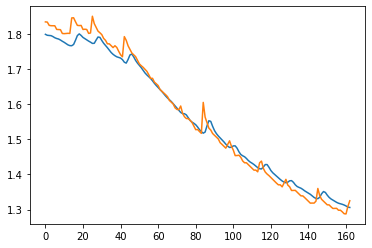

In [1463]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()